In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


## Importamos las librerías que necesitaremos

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Cargamos el data frame que vamos a estar trabajando

In [3]:
df_original = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv", parse_dates=["date"])
df_original.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              5236 non-null   object        
 1   iso_code                             4908 non-null   object        
 2   date                                 5236 non-null   datetime64[ns]
 3   total_vaccinations                   3362 non-null   float64       
 4   people_vaccinated                    2934 non-null   float64       
 5   people_fully_vaccinated              1997 non-null   float64       
 6   daily_vaccinations_raw               2830 non-null   float64       
 7   daily_vaccinations                   5053 non-null   float64       
 8   total_vaccinations_per_hundred       3362 non-null   float64       
 9   people_vaccinated_per_hundred        2934 non-null   float64       
 10  people_fully

Notamos que el país y la fecha no tienen entradas faltantes, y son ideales para usarlos como identificador de nuestra entrada. Así que procedemos a ponerlos como índice. Adicionalmente, para el estudio que realizaremos, asumiremos que los datos son correctos (siempre que no haya evidencia de lo contrario), así que para el análisis, nos desharemos de las últimas dos columnas. Por último, notamos que hay muchos datos faltantes en algunas columnas y muchos datos que en teoría dependen de otros datos, así que deberíamos realizar algunas validaciones. 


In [5]:
df = df_original.set_index(["country", "date"]).drop(["source_name","source_website", "iso_code"], axis=1)
df.head()

total_vaccinations  people_vaccinated  \
country date                                                
Albania 2021-01-10                 0.0                0.0   
        2021-01-11                 NaN                NaN   
        2021-01-12               128.0              128.0   
        2021-01-13               188.0              188.0   
        2021-01-14               266.0              266.0   

                    people_fully_vaccinated  daily_vaccinations_raw  \
country date                                                          
Albania 2021-01-10                      NaN                     NaN   
        2021-01-11                      NaN                     NaN   
        2021-01-12                      NaN                     NaN   
        2021-01-13                      NaN                    60.0   
        2021-01-14                      NaN                    78.0   

                    daily_vaccinations  total_vaccinations_per_hundred  \
country date                                                             
Albania 2021-01-10                 NaN                            0.00   
        2021-01-11                64.0                             NaN   
        2021-01-12                64.0                            0.00   
        2021-01-13                63.0                            0.01   
        2021-01-14                66.0                            0.01   

                    people_vaccinated_per_hundred  \
country date                                        
Albania 2021-01-10                           0.00   
        2021-01-11                            NaN   
        2021-01-12                           0.00   
        2021-01-13                           0.01   
        2021-01-14                           0.01   

                    people_fully_vaccinated_per_hundred  \
country date                                              
Albania 2021-01-10                                  NaN   
        2021-01-11                                  NaN   
        2021-01-12                                  NaN   
        2021-01-13                                  NaN   
        2021-01-14                                  NaN   

                    daily_vaccinations_per_million         vaccines  
country date                                                         
Albania 2021-01-10                             NaN  Pfizer/BioNTech  
        2021-01-11                            22.0  Pfizer/BioNTech  
        2021-01-12                            22.0  Pfizer/BioNTech  
        2021-01-13                            22.0  Pfizer/BioNTech  
        2021-01-14                            23.0  Pfizer/BioNTech

### Validaciones

In [6]:
#total_vaccinations es el número de vacunas administradas, 
#mientras que people_vaccinated es el número total de personas vacunadas 
#(estos números pueden diferir porque hay )
cond = df["total_vaccinations"] == df["people_vaccinated"]
display(df[~cond & ~df["total_vaccinations"].isna()].head())

cond = df["total_vaccinations"] < df["people_vaccinated"]
display(df[cond].head()) #cambiar por un assert #revisar

total_vaccinations  people_vaccinated  \
country date                                                
Albania 2021-02-02               550.0              549.0   
        2021-02-09              1127.0              689.0   
        2021-02-17              1701.0             1090.0   
        2021-02-18              3049.0             2438.0   
        2021-02-19              4177.0                NaN   

                    people_fully_vaccinated  daily_vaccinations_raw  \
country date                                                          
Albania 2021-02-02                      1.0                     NaN   
        2021-02-09                    438.0                     NaN   
        2021-02-17                    611.0                     NaN   
        2021-02-18                    611.0                  1348.0   
        2021-02-19                      NaN                  1128.0   

                    daily_vaccinations  total_vaccinations_per_hundred  \
country date                                                             
Albania 2021-02-02                 NaN                            0.02   
        2021-02-09                82.0                            0.04   
        2021-02-17                72.0                            0.06   
        2021-02-18               254.0                            0.11   
        2021-02-19               405.0                            0.15   

                    people_vaccinated_per_hundred  \
country date                                        
Albania 2021-02-02                           0.02   
        2021-02-09                           0.02   
        2021-02-17                           0.04   
        2021-02-18                           0.08   
        2021-02-19                            NaN   

                    people_fully_vaccinated_per_hundred  \
country date                                              
Albania 2021-02-02                                 0.00   
        2021-02-09                                 0.02   
        2021-02-17                                 0.02   
        2021-02-18                                 0.02   
        2021-02-19                                  NaN   

                    daily_vaccinations_per_million         vaccines  
country date                                                         
Albania 2021-02-02                             NaN  Pfizer/BioNTech  
        2021-02-09                            28.0  Pfizer/BioNTech  
        2021-02-17                            25.0  Pfizer/BioNTech  
        2021-02-18                            88.0  Pfizer/BioNTech  
        2021-02-19                           141.0  Pfizer/BioNTech

,,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
country,date,,,,,,,,,,


Continuaremos viendo cuantos son los países y cuántos/cuales son los tipos de vacunas en el data frame. 

In [7]:
countries = list(df.index.get_level_values(0).unique())
print(f"Hay {len(countries)} paises distintos")

Hay 124 paises distintos


In [8]:
vaccines = list(df["vaccines"].unique())
vaccines[0:5]

['Pfizer/BioNTech',
 'Sputnik V',
 'Oxford/AstraZeneca',
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
 'Oxford/AstraZeneca, Sputnik V']

Notemos que cada país puede tener más de una vacuna, por ejemplo 
$\texttt{vacines[3]}$: 


In [9]:
vaccines[3]

'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'

Las vacunas están divididas por comas, así que las contaremos de otra forma

In [10]:
vaccines1 = []
for lis in pd.Series(vaccines).str.split(","):
    vaccines1.extend(lis)

In [11]:
vaccines = pd.Series(vaccines1).str.strip().unique()
print(f"Hay {len(vaccines)} vacunas diferentes:")
print(vaccines)

Hay 10 vacunas diferentes:
['Pfizer/BioNTech' 'Sputnik V' 'Oxford/AstraZeneca' 'Moderna'
 'Sinopharm/Beijing' 'Sinovac' 'Sinopharm/Wuhan' 'Covaxin' 'EpiVacCorona'
 'Johnson&Johnson']


## Análisis exploratorio de datos(EDA)

Para comenzar, graficaremos el total de vacunaciones ($\texttt{total\-vaccinations}$) que ha habido en el tiempo por país. Para esto rellenaremos los valores faltantes con el valor inmediato anterior (forward fill). También hay que considerar que si hacemos una gráfica para cada país, sobrepoblaríamos la gráfica, entonces tomaremos un sample de 20 países. 



In [12]:
cols_to_fill = ["total_vaccinations", "people_vaccinated", "total_vaccinations_per_hundred"] #falta escoger columnas #revisar 
df.loc[:, cols_to_fill].fillna(method="ffill", inplace=True)


In [13]:
countries_to_plot = pd.Series(countries).sample(20)
samples_bool = df.index.get_level_values("country").isin(countries_to_plot)
df_to_plot = df[samples_bool]

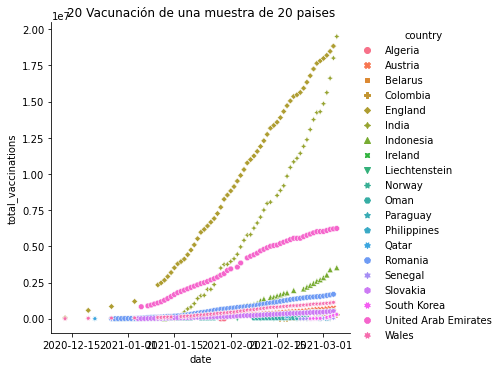

In [14]:
x = sns.relplot(data=df_to_plot, x="date", y="total_vaccinations", hue="country", style="country")
plt.title("20 Vacunación de una muestra de 20 paises");
#rotar las etiquetas del eje y #revisar

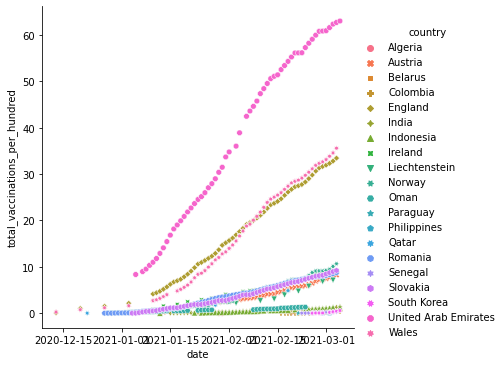

In [15]:
x = sns.relplot(data=df_to_plot, x="date", y="total_vaccinations_per_hundred", hue="country", style="country")
#averiguar como poner ambas gráficas en una misma

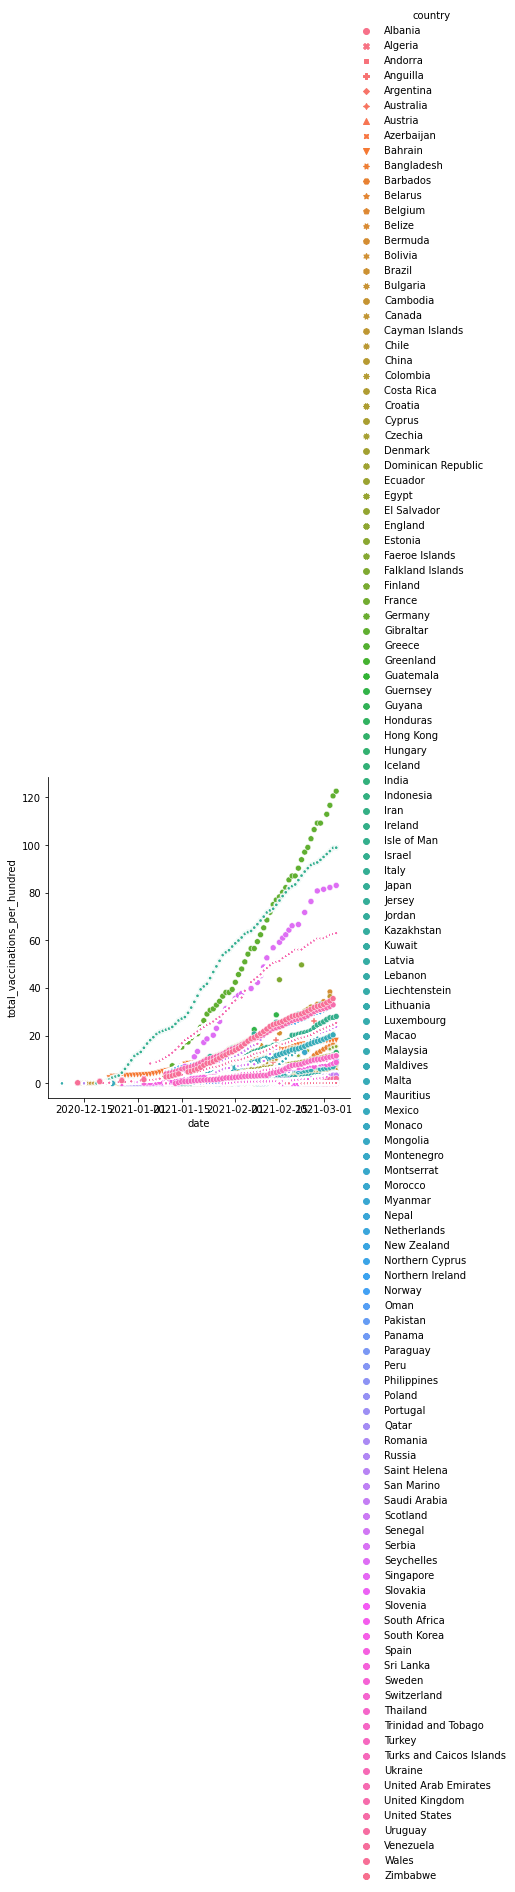

In [16]:
x = sns.relplot(data=df, x="date", y="total_vaccinations_per_hundred", hue="country", style="country")
#averiguar como poner ambas gráficas en una misma

In [17]:
df[df["total_vaccinations_per_hundred"] > 100]

total_vaccinations  people_vaccinated  \
country   date                                                
Gibraltar 2021-02-25             34600.0            21591.0   
          2021-02-26             35890.0            22712.0   
          2021-02-27             36808.0            23518.0   
          2021-02-28             36808.0            23518.0   
          2021-03-02             38056.0            24352.0   
          2021-03-03             39322.0            25221.0   
          2021-03-04             40652.0            25629.0   
          2021-03-05             41318.0            26163.0   

                      people_fully_vaccinated  daily_vaccinations_raw  \
country   date                                                          
Gibraltar 2021-02-25                  13009.0                  1229.0   
          2021-02-26                  13178.0                  1290.0   
          2021-02-27                  13290.0                   918.0   
          2021-02-28                  13290.0                     0.0   
          2021-03-02                  13704.0                     NaN   
          2021-03-03                  14101.0                  1266.0   
          2021-03-04                  15023.0                  1330.0   
          2021-03-05                  15155.0                   666.0   

                      daily_vaccinations  total_vaccinations_per_hundred  \
country   date                                                             
Gibraltar 2021-02-25               832.0                          102.70   
          2021-02-26               937.0                          106.53   
          2021-02-27              1068.0                          109.25   
          2021-02-28               911.0                          109.25   
          2021-03-02               764.0                          112.96   
          2021-03-03               850.0                          116.71   
          2021-03-04               865.0                          120.66   
          2021-03-05               775.0                          122.64   

                      people_vaccinated_per_hundred  \
country   date                                        
Gibraltar 2021-02-25                          64.09   
          2021-02-26                          67.41   
          2021-02-27                          69.80   
          2021-02-28                          69.80   
          2021-03-02                          72.28   
          2021-03-03                          74.86   
          2021-03-04                          76.07   
          2021-03-05                          77.66   

                      people_fully_vaccinated_per_hundred  \
country   date                                              
Gibraltar 2021-02-25                                38.61   
          2021-02-26                                39.11   
          2021-02-27                                39.45   
          2021-02-28                                39.45   
          2021-03-02                                40.68   
          2021-03-03                                41.85   
          2021-03-04                                44.59   
          2021-03-05                                44.98   

                      daily_vaccinations_per_million         vaccines  
country   date                                                         
Gibraltar 2021-02-25                         24695.0  Pfizer/BioNTech  
          2021-02-26                         27812.0  Pfizer/BioNTech  
          2021-02-27                         31700.0  Pfizer/BioNTech  
          2021-02-28                         27040.0  Pfizer/BioNTech  
          2021-03-02                         22677.0  Pfizer/BioNTech  
          2021-03-03                         25229.0  Pfizer/BioNTech  
          2021-03-04                         25675.0  Pfizer/BioNTech  
          2021-03-05                         23003.0  Pfizer/BioNTech

In [47]:
vacc_dict = {}
for vacc in vaccines:
    grouped = df["vaccines"].groupby("country").sum()
    vacc_dict[vacc] = len(grouped[grouped.str.contains(vacc)])
    

In [ ]:
vacc_dict